Source:
* [Geeks for Geeks - SARSA Reinforcement Learning](https://www.geeksforgeeks.org/sarsa-reinforcement-learning/)
* [Towards Data Science - Reinforcement learning: Temporal-Difference, SARSA, Q-Learning & Expected SARSA in python](https://towardsdatascience.com/reinforcement-learning-temporal-difference-sarsa-q-learning-expected-sarsa-on-python-9fecfda7467e)
* [A Name Not Yet Taken AB - SARSA Algorithm in Python](https://www.annytab.com/sarsa-algorithm-in-python/)

# Importing the required libraries

In [1]:
import numpy as np
import gym
import time
import math
from tqdm import tqdm

# Building the environment

Environments preloaded into gym:
* [FrozenLake-v0](https://gym.openai.com/envs/FrozenLake-v0/)
* [Taxi-v3](https://gym.openai.com/envs/Taxi-v3/)

In [2]:
env_name = 'FrozenLake-v0'

env = gym.make(env_name)

# Defining utility functions to be used in the learning process

## Initialising Q

In [3]:
def init_Q(n_states, n_actions, init_Q_type="ones"):
    """
    @param n_states the number of states
    @param n_actions the number of actions
    @param type random, ones or zeros for the initialization
    """
    if init_Q_type == "ones":
        return np.ones((n_states, n_actions))
    elif init_Q_type == "random":
        return np.random.random((n_states, n_actions))
    elif init_Q_type == "zeros":
        return np.zeros((n_states, n_actions))

## Choose an action

In [4]:
# Numpy generator
rng = np.random.default_rng()  # Create a default Generator.

In [5]:
def epsilon_greedy(Q, state, n_actions, epsilon):
    """
    @param Q Q values {state, action} -> value
    @param epsilon for exploration
    @param n_actions number of actions
    @param state state at time t
    """
    if rng.uniform(0, 1) < epsilon:
        action = np.random.randint(0, n_actions)
        #action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

## Update Q-matrice (state-action value function)

In [6]:
# Function to learn the Q-value  - Is it temporal-difference?
def update(state1, action1, reward1, state2, action2, expected=False):
    
    predict = Q[state1, action1] 
    
    target = reward1 + gamma * Q[state2, action2] 
    if expected:
        expected_value = np.mean(Q[state2,:])
        target = reward1 + gamma * expected_value
    
    Q[state1, action1] = Q[state1, action1] + alpha * (target - predict)

## Updating parameters

### Epsilon $\epsilon$ - Exploration rate

In [7]:
# Exploration rate

def get_epsilon(episode, init_epsilon, divisor=25):
    
    n_epsilon = init_epsilon/(episode/1000+1)
    # n_epsilon = min(1, 1.0 - math.log10((episode + 1) / divisor))
    
    return n_epsilon

### Alpha $\alpha$ - Learning rate

In [8]:
# Learning rate

def get_alpha(episode, init_alpha, divisor=25):
    
    n_alpha = init_alpha/(episode/1000+1)
    # n_alpha = min(1.0, 1.0 - math.log10((episode + 1) / divisor))
    
    return n_alpha

# Initializing different parameters

In [9]:
# Defining the different parameters 
init_epsilon = 1 # trade-off exploration/exploitation - better if decreasing
init_alpha = 0.5 # learning rate, better if decreasing

# Specific to environment
gamma = 0.95 # discount for future rewards (also called decay factor)
n_states = env.observation_space.n
n_actions = env.action_space.n

# Episodes
n_episodes = 1000000
nmax_steps = 100 # maximum steps per episode

# Initializing the Q-matrix 
Q = init_Q(n_states, n_actions, init_Q_type="zeros")

# Training the learning agent

In [10]:
# Visualisation
(render_episode, render_training) = (False, False)

In [11]:
# Initializing the reward
evolution_reward = []
evolution_steps = []

In [12]:
# Starting the SARSA learning 
for episode in tqdm(range(n_episodes)):
        
    n_episode_steps = 0
    episode_reward = 0
    done = False
    
    state1 = env.reset()
    action1 = epsilon_greedy(Q, state1, n_actions, init_epsilon)
    
    while (not done) and (n_episode_steps < nmax_steps):
        
        # Update parameters
        epsilon = get_epsilon(episode, init_epsilon)
        alpha = get_alpha(episode, init_alpha)
        
        # Visualizing the training
        if render_training:
            env.render() 
        
        # Getting the next state 
        state2, reward1, done, info = env.step(action1)
        episode_reward += reward1
  
        # Choosing the next action 
        action2 = epsilon_greedy(Q, state2, n_actions, epsilon)

        # Learning the Q-value 
        update(state1, action1, reward1, state2, action2)

        # Updating the respective vaLues 
        state1 = state2 
        action1 = action2
        n_episode_steps += 1
        
    # At the end of learning process 
    if render_episode:
        print('Episode {0}, Score: {1}, Timesteps: {2}, Epsilon: {3}, Alpha: {4}'.format(
            episode+1, episode_reward, n_episode_steps, epsilon, alpha))
    
    evolution_reward.append(episode_reward)
    evolution_steps.append(n_episode_steps)

100%|██████████| 1000000/1000000 [12:54<00:00, 1291.50it/s]


For FrozenLake-v0: In the above output, the red mark determines the current position of the agent in the environment while the direction given in brackets gives the direction of movement that the agent will make next. Note that the agent stays at it’s position if goes out of bounds.

# Evaluating the performance

## Mean reward

In [13]:
# Evaluating the performance 
print ("Performace : ", sum(evolution_reward)/n_episodes) 

# Visualizing the Q-matrix 
print(Q) 

Performace :  0.354457
[[3.33951213e-04 3.74268387e-04 3.74246395e-04 2.34560382e-04]
 [1.66807750e-04 5.04155735e-04 5.41009681e-04 6.47171146e-04]
 [2.48599452e-03 2.30066851e-03 2.79054228e-03 6.81121432e-04]
 [5.45193930e-04 5.56122059e-04 2.25265136e-04 7.22721022e-04]
 [1.23804204e-03 1.09291577e-03 1.02626708e-03 2.77105412e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.11552046e-02 1.06769590e-02 1.37794051e-02 4.56396690e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.18636790e-03 5.27994088e-03 4.53501379e-03 6.09737608e-03]
 [1.54951339e-02 2.86134428e-02 2.57163463e-02 1.30636391e-02]
 [7.92144094e-02 6.62328641e-02 6.72242384e-02 6.87165170e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.84179201e-02 7.51944793e-02 9.07446345e-02 7.17069517e-02]
 [9.48288345e-02 3.80121277e-01 4.19874240e-01 3.51078445e-01]
 [0.00000000e+00 0.00000000e+00 

In [14]:
import numpy as np
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

10000

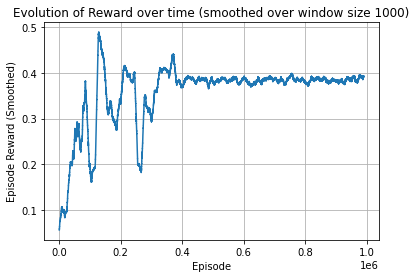

In [31]:
import numpy as np
import matplotlib.pyplot as plt

n_moving_points = int(np.ceil(len(evolution_reward)/100))
y = running_mean(evolution_reward,n_moving_points)
x = range(len(y))

plt.plot(x, y)
plt.title('Evolution of Reward over time (smoothed over window size 1000)')
plt.xlabel('Episode') # will add a label “Year” to your x-axis
plt.ylabel('Episode Reward (Smoothed)') # will add a label “Population” to your y-axis
plt.xticks() # set the numbers on the x-axis to be 1, 2, 3, 4, 5. We can also pass and labels as a second argument. For, example, if we use this code plt.xticks([1, 2, 3, 4, 5], ["1M", "2M", "3M", "4M", "5M"]), it will set the labels 1M, 2M, 3M, 4M, 5M on the x-axis.
plt.yticks() # - works the same as plt.xticks(), but for the y-axis.
plt.grid(True)
plt.show()

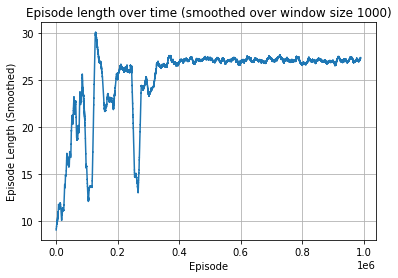

In [32]:
import numpy as np
import matplotlib.pyplot as plt

n_moving_points = int(np.ceil(len(evolution_steps)/100))
y = running_mean(evolution_steps,n_moving_points)
x = range(len(y))

plt.plot(x, y)
plt.title('Episode length over time (smoothed over window size 1000)')
plt.xlabel('Episode') # will add a label “Year” to your x-axis
plt.ylabel('Episode Length (Smoothed)') # will add a label “Population” to your y-axis
plt.xticks() # set the numbers on the x-axis to be 1, 2, 3, 4, 5. We can also pass and labels as a second argument. For, example, if we use this code plt.xticks([1, 2, 3, 4, 5], ["1M", "2M", "3M", "4M", "5M"]), it will set the labels 1M, 2M, 3M, 4M, 5M on the x-axis.
plt.yticks() # - works the same as plt.xticks(), but for the y-axis.
plt.grid(True)
plt.show()

In [17]:
np.arange(0, len(x), 1000)

array([     0,   1000,   2000,   3000,   4000,   5000,   6000,   7000,
         8000,   9000,  10000,  11000,  12000,  13000,  14000,  15000,
        16000,  17000,  18000,  19000,  20000,  21000,  22000,  23000,
        24000,  25000,  26000,  27000,  28000,  29000,  30000,  31000,
        32000,  33000,  34000,  35000,  36000,  37000,  38000,  39000,
        40000,  41000,  42000,  43000,  44000,  45000,  46000,  47000,
        48000,  49000,  50000,  51000,  52000,  53000,  54000,  55000,
        56000,  57000,  58000,  59000,  60000,  61000,  62000,  63000,
        64000,  65000,  66000,  67000,  68000,  69000,  70000,  71000,
        72000,  73000,  74000,  75000,  76000,  77000,  78000,  79000,
        80000,  81000,  82000,  83000,  84000,  85000,  86000,  87000,
        88000,  89000,  90000,  91000,  92000,  93000,  94000,  95000,
        96000,  97000,  98000,  99000, 100000, 101000, 102000, 103000,
       104000, 105000, 106000, 107000, 108000, 109000, 110000, 111000,
      

## Evaluation through episode

In [20]:
# Variables
episodes = 1000
nmax_steps = 200
total_reward = 0

In [21]:
# Loop episodes
for episode in range(episodes):

    n_episode_steps = 0
    episode_reward = 0
    done = False
    
    # Start episode and get initial observation
    state = env.reset()
    
    while (not done) and (n_episode_steps < nmax_steps):

        # Get an action (0:Left, 1:Down, 2:Right, 3:Up)
        action = np.argmax(Q[state,:])

        # Perform a step
        state, reward, done, info = env.step(action)

        # Update score
        episode_reward += reward
        total_reward += reward

        n_episode_steps += 1
        
    print('Episode {0}, Score: {1}, Timesteps: {2}'.format(
        episode+1, episode_reward, n_episode_steps))


# Close the environment
env.close()

# Print the score
print('--- Evaluation ---')
print ('Score: {0} / {1}'.format(total_reward, episodes))
print()

Episode 1, Score: 1.0, Timesteps: 31
Episode 2, Score: 0.0, Timesteps: 65
Episode 3, Score: 1.0, Timesteps: 44
Episode 4, Score: 1.0, Timesteps: 27
Episode 5, Score: 0.0, Timesteps: 39
Episode 6, Score: 0.0, Timesteps: 5
Episode 7, Score: 1.0, Timesteps: 18
Episode 8, Score: 1.0, Timesteps: 40
Episode 9, Score: 0.0, Timesteps: 17
Episode 10, Score: 0.0, Timesteps: 61
Episode 11, Score: 0.0, Timesteps: 11
Episode 12, Score: 1.0, Timesteps: 10
Episode 13, Score: 1.0, Timesteps: 12
Episode 14, Score: 0.0, Timesteps: 73
Episode 15, Score: 0.0, Timesteps: 43
Episode 16, Score: 0.0, Timesteps: 11
Episode 17, Score: 0.0, Timesteps: 46
Episode 18, Score: 1.0, Timesteps: 11
Episode 19, Score: 0.0, Timesteps: 46
Episode 20, Score: 1.0, Timesteps: 11
Episode 21, Score: 1.0, Timesteps: 65
Episode 22, Score: 0.0, Timesteps: 4
Episode 23, Score: 0.0, Timesteps: 6
Episode 24, Score: 0.0, Timesteps: 96
Episode 25, Score: 1.0, Timesteps: 29
Episode 26, Score: 1.0, Timesteps: 43
Episode 27, Score: 0.0, 

Episode 299, Score: 0.0, Timesteps: 35
Episode 300, Score: 0.0, Timesteps: 13
Episode 301, Score: 1.0, Timesteps: 10
Episode 302, Score: 0.0, Timesteps: 10
Episode 303, Score: 1.0, Timesteps: 11
Episode 304, Score: 0.0, Timesteps: 10
Episode 305, Score: 1.0, Timesteps: 61
Episode 306, Score: 0.0, Timesteps: 22
Episode 307, Score: 0.0, Timesteps: 22
Episode 308, Score: 1.0, Timesteps: 18
Episode 309, Score: 0.0, Timesteps: 8
Episode 310, Score: 1.0, Timesteps: 12
Episode 311, Score: 0.0, Timesteps: 37
Episode 312, Score: 1.0, Timesteps: 10
Episode 313, Score: 0.0, Timesteps: 15
Episode 314, Score: 1.0, Timesteps: 17
Episode 315, Score: 1.0, Timesteps: 11
Episode 316, Score: 1.0, Timesteps: 22
Episode 317, Score: 0.0, Timesteps: 22
Episode 318, Score: 1.0, Timesteps: 33
Episode 319, Score: 1.0, Timesteps: 26
Episode 320, Score: 0.0, Timesteps: 7
Episode 321, Score: 0.0, Timesteps: 5
Episode 322, Score: 1.0, Timesteps: 18
Episode 323, Score: 1.0, Timesteps: 73
Episode 324, Score: 0.0, Tim

Episode 591, Score: 0.0, Timesteps: 100
Episode 592, Score: 0.0, Timesteps: 28
Episode 593, Score: 1.0, Timesteps: 37
Episode 594, Score: 0.0, Timesteps: 52
Episode 595, Score: 1.0, Timesteps: 14
Episode 596, Score: 1.0, Timesteps: 58
Episode 597, Score: 0.0, Timesteps: 10
Episode 598, Score: 1.0, Timesteps: 21
Episode 599, Score: 0.0, Timesteps: 11
Episode 600, Score: 0.0, Timesteps: 13
Episode 601, Score: 0.0, Timesteps: 48
Episode 602, Score: 0.0, Timesteps: 4
Episode 603, Score: 0.0, Timesteps: 34
Episode 604, Score: 0.0, Timesteps: 20
Episode 605, Score: 0.0, Timesteps: 32
Episode 606, Score: 1.0, Timesteps: 24
Episode 607, Score: 1.0, Timesteps: 14
Episode 608, Score: 1.0, Timesteps: 49
Episode 609, Score: 0.0, Timesteps: 17
Episode 610, Score: 0.0, Timesteps: 35
Episode 611, Score: 0.0, Timesteps: 36
Episode 612, Score: 0.0, Timesteps: 43
Episode 613, Score: 0.0, Timesteps: 7
Episode 614, Score: 0.0, Timesteps: 62
Episode 615, Score: 1.0, Timesteps: 57
Episode 616, Score: 1.0, T

Episode 867, Score: 0.0, Timesteps: 15
Episode 868, Score: 0.0, Timesteps: 9
Episode 869, Score: 0.0, Timesteps: 8
Episode 870, Score: 0.0, Timesteps: 18
Episode 871, Score: 0.0, Timesteps: 13
Episode 872, Score: 0.0, Timesteps: 25
Episode 873, Score: 0.0, Timesteps: 16
Episode 874, Score: 1.0, Timesteps: 29
Episode 875, Score: 1.0, Timesteps: 25
Episode 876, Score: 0.0, Timesteps: 9
Episode 877, Score: 1.0, Timesteps: 12
Episode 878, Score: 1.0, Timesteps: 63
Episode 879, Score: 0.0, Timesteps: 12
Episode 880, Score: 0.0, Timesteps: 40
Episode 881, Score: 0.0, Timesteps: 11
Episode 882, Score: 0.0, Timesteps: 54
Episode 883, Score: 0.0, Timesteps: 19
Episode 884, Score: 0.0, Timesteps: 40
Episode 885, Score: 0.0, Timesteps: 15
Episode 886, Score: 0.0, Timesteps: 57
Episode 887, Score: 1.0, Timesteps: 15
Episode 888, Score: 0.0, Timesteps: 23
Episode 889, Score: 1.0, Timesteps: 10
Episode 890, Score: 0.0, Timesteps: 63
Episode 891, Score: 0.0, Timesteps: 9
Episode 892, Score: 0.0, Time